In [29]:

import sys  
# to include the src files
sys.path.insert(0, '../src')
from prepare_dataset import get_single_image_dataframe
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

In [1]:
# "data/raw/Test_images/Sandstone_Versa0250.tif"
input_image_path = "../data/raw/Test_images/Sandstone_Versa0250.tif"

'data/raw/Test_images/Sandstone_Versa0250.tif'

In [3]:
# get image path as argument
# create dataframe of all the features
image_feature = get_single_image_dataframe(input_image_path)

In [4]:
image = cv2.imread(input_image_path, 0)

image_height = image.shape[0]
image_width = image.shape[1]
print(image.shape)

(1024, 996)


## Get the segmented image

In [5]:
# loading the model
model_path = '../models/dtree.pkl'
loaded_model = pickle.load(open(model_path, 'rb'))

pred_labels = loaded_model.predict(image_feature)

In [6]:
pred_labels.shape

(1019904,)

In [7]:
1024 * 996

1019904

In [8]:
segmented_image = pred_labels.reshape((image_height, image_width))

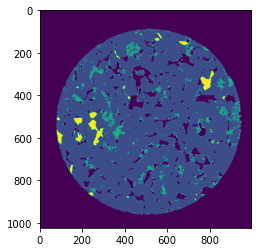

In [12]:
plt.imshow(segmented_image)

In [56]:
new_image = np.zeros((image_height, image_width, 3), np.uint8)
new_image.shape

(1024, 996, 3)

In [60]:
pores_index = segmented_image==29
new_image[pores_index] = np.array([0, 0, 255], np.uint8)

quartz_index = segmented_image==76
new_image[quartz_index] = [255, 0, 0]

clay_index = segmented_image==150
new_image[clay_index] = [0, 255, 0]

heavy_index = segmented_image==226
new_image[heavy_index] = [255, 255, 0]

new_image.shape

(1024, 996, 3)

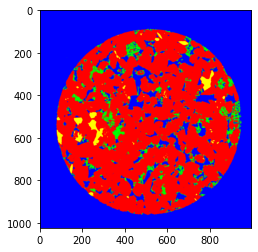

In [61]:
plt.imshow(new_image)

In [63]:
RGBimage = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

In [64]:
# cv2.imwrite("../results/output_mask.png", RGBimage)
cv2.imwrite("../results/output_mask.png", RGBimage)

True

## Show real mask

In [13]:
real_mask_path = "../data/raw/Test_masks/Sandstone_Versa0250.tif"

In [19]:
mask_image = cv2.imread(real_mask_path,)

mask_rgb = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)
print(mask_image.shape)

(1024, 996, 3)


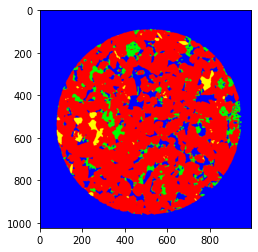

In [20]:
plt.imshow(mask_rgb)

### Path split

In [45]:
input_image_path  

'../data/raw/Test_images/Sandstone_Versa0250.tif'

In [50]:
image_name = input_image_path.split("/")[-1][:-4]
image_name

'Sandstone_Versa0250'